# Pet Dataset Segmentation
## Machine Learning data mining final project
### __Team members:__ Vedanshi Shah, Vedant Bhagat, Sid Mallareddygari

In [2]:
# imports
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import xml.etree.ElementTree as ET

In [3]:
# read the data
dataset_path = 'data/'

# Set up
#### Describe the dataset, including its basic statistics. 

In [4]:
# Loop over all the images in the dataset
for filename in os.listdir(os.path.join(dataset_path, 'images')):
    # Load the image
    img = cv2.imread(os.path.join(dataset_path, 'images', filename))

    # Load the corresponding annotation file (if available)
    annotation_file = os.path.join(dataset_path, 'annotations', filename.split('.')[0] + '.xml')
    if os.path.exists(annotation_file):
        tree = ET.parse(annotation_file)
        root = tree.getroot()

        # Extract the object(s) from the annotation file
        for obj in root.findall('object'):
            obj_name = obj.find('name').text
            obj_bbox = obj.find('bndbox')
            obj_xmin = int(obj_bbox.find('xmin').text)
            obj_ymin = int(obj_bbox.find('ymin').text)
            obj_xmax = int(obj_bbox.find('xmax').text)
            obj_ymax = int(obj_bbox.find('ymax').text)

            # Extract the object mask from the trimap file (if available)
            trimap_file = os.path.join(dataset_path, 'trimaps', filename.split('.')[0] + '.png')
            if os.path.exists(trimap_file):
                trimap = cv2.imread(trimap_file, cv2.IMREAD_GRAYSCALE)
                obj_mask = np.zeros_like(trimap)
                obj_mask[(trimap == 128) | (trimap == 255)] = 255
                obj_mask = obj_mask[obj_ymin:obj_ymax, obj_xmin:obj_xmax]
            else:
                obj_mask = None

            # Process the object as needed
            if obj_mask is not None:
                obj_img = cv2.bitwise_and(img[obj_ymin:obj_ymax, obj_xmin:obj_xmax], img[obj_ymin:obj_ymax, obj_xmin:obj_xmax], mask=obj_mask)
                
                # Save the segmented object as a separate image
                obj_filename = f"{os.path.splitext(filename)[0]}_{obj_name}.jpg"
                cv2.imwrite(os.path.join(dataset_path, 'objects', obj_filename), obj_img)
            else:
                print(f"No object mask found for object: {obj_name}")
        print(f'annotation for file : {filename} is done')
    else:
        # print(f"No annotation file found for image: {filename}")
        pass

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


read image and corresponding annotations

In [5]:
import os

# specify the path of the image folder
folder_path = 'data/images/'

# read all files in the folder with extension '.jpg'
image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')]

# print the list of image paths
print(image_paths)


['data/images/Egyptian_Mau_167.jpg', 'data/images/pug_52.jpg', 'data/images/basset_hound_112.jpg', 'data/images/Siamese_193.jpg', 'data/images/shiba_inu_122.jpg', 'data/images/Siamese_53.jpg', 'data/images/Birman_167.jpg', 'data/images/leonberger_6.jpg', 'data/images/Siamese_47.jpg', 'data/images/shiba_inu_136.jpg', 'data/images/saint_bernard_139.jpg', 'data/images/Birman_173.jpg', 'data/images/Abyssinian_225.jpg', 'data/images/basset_hound_106.jpg', 'data/images/miniature_pinscher_200.jpg', 'data/images/Siamese_187.jpg', 'data/images/wheaten_terrier_49.jpg', 'data/images/Egyptian_Mau_173.jpg', 'data/images/pug_46.jpg', 'data/images/shiba_inu_43.jpg', 'data/images/wheaten_terrier_61.jpg', 'data/images/saint_bernard_111.jpg', 'data/images/scottish_terrier_132.jpg', 'data/images/scottish_terrier_126.jpg', 'data/images/saint_bernard_105.jpg', 'data/images/saint_bernard_2.jpg', 'data/images/pomeranian_189.jpg', 'data/images/Abyssinian_219.jpg', 'data/images/shiba_inu_57.jpg', 'data/images/

In [6]:
image_paths[0]

'data/images/Egyptian_Mau_167.jpg'

In [7]:
import cv2
import tensorflow as tf

def read_image_and_annotation(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    annotation_path = image_path.replace("images", "annotations/xmls").replace(".jpg", ".xml")
    with tf.io.gfile.GFile(annotation_path, "rb") as f:
        annot = f.read()
    return img, annot


# read all paths in the image folder

image_path = "data/images/Abyssinian_1.jpg"
img, annot = read_image_and_annotation(image_path)

In [8]:
import xml.etree.ElementTree as ET

# parse the XML string
xml_str = annot
root = ET.fromstring(xml_str)

# extract the filename
filename = root.find('filename').text
print(filename)

Abyssinian_1.jpg


In [9]:
# data frame with all the information 
import pandas as pd
import os
import numpy as np
import cv2

# specify the path of the image folder
folder_path = 'data/images/'

# read all files in the folder with extension '.jpg'
image_paths = [os.path.join(folder_path, file) for file in os.listdir(folder_path) if file.endswith('.jpg')]

df = pd.DataFrame(columns=['image', 'label', 'breed'])
rows = []

for image_path in image_paths:
    img = cv2.imread(image_path)
    if img is None:
        print(f"Error: could not read image at {image_path}")
        continue
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # convert color from BGR (used by OpenCV) to RGB
    img_array = np.array(img)

    # image path get name
    filename = image_path.split('/')[-1]
    breed = filename.rsplit('_', 1)
    breed = breed[0]
    
    # breed is cat if the first char of the filename is Upper case
    if filename[0].isupper():
        label = 'cat'
    else:
        label = 'dog'

    row = {'image': img, 'label': label, 'breed': breed, 'filename': filename}
    rows.append(row)
    
df = pd.DataFrame(rows)

Error: could not read image at data/images/Egyptian_Mau_167.jpg


Corrupt JPEG data: premature end of data segment


Error: could not read image at data/images/Egyptian_Mau_177.jpg
Error: could not read image at data/images/Egyptian_Mau_139.jpg


Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


Error: could not read image at data/images/Abyssinian_34.jpg
Error: could not read image at data/images/Egyptian_Mau_191.jpg
Error: could not read image at data/images/Egyptian_Mau_145.jpg


In [10]:
df.head()

,image,label,breed,filename
0,"[[[56, 18, 15], [54, 16, 13], [55, 17, 14], [5...",dog,pug,pug_52.jpg
1,"[[[188, 190, 205], [190, 189, 205], [192, 191,...",dog,basset_hound,basset_hound_112.jpg
2,"[[[95, 78, 48], [96, 80, 44], [94, 74, 39], [8...",cat,Siamese,Siamese_193.jpg
3,"[[[56, 89, 8], [57, 90, 9], [54, 89, 7], [55, ...",dog,shiba_inu,shiba_inu_122.jpg
4,"[[[112, 84, 60], [127, 81, 66], [112, 82, 54],...",cat,Siamese,Siamese_53.jpg


In [11]:
american_pitbulls = df[df['breed'] == 'American Pit Bull Terrier']
american_pitbulls

,image,label,breed,filename


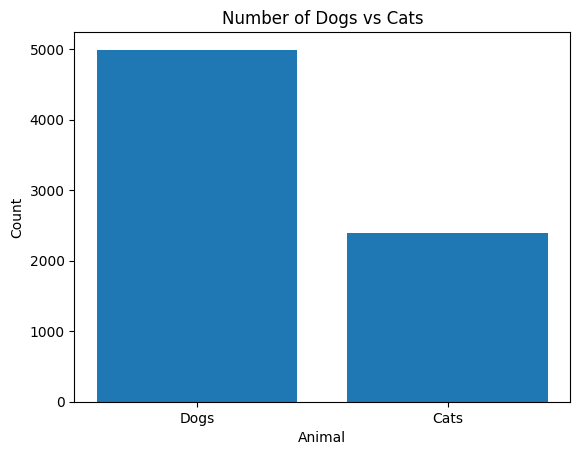

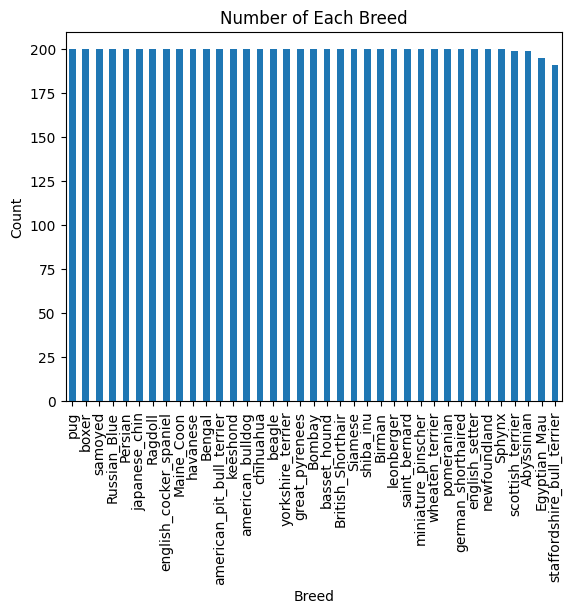

In [12]:
import matplotlib.pyplot as plt
# Count the number of dogs and cats
dog_count = (df['label'] == 'dog').sum()
cat_count = (df['label'] == 'cat').sum()

# Create a bar plot of the dog and cat counts
plt.bar(['Dogs', 'Cats'], [dog_count, cat_count])
plt.title('Number of Dogs vs Cats')
plt.xlabel('Animal')
plt.ylabel('Count')
plt.show()

# Count the number of each breed
breed_counts = df['breed'].value_counts()

# Create a bar plot of the breed counts
breed_counts.plot(kind='bar')
plt.title('Number of Each Breed')
plt.xlabel('Breed')
plt.ylabel('Count')
plt.show()

In [13]:
df[['breed', 'label']].describe()

,breed,label
count,7384,7384
unique,37,2
top,pug,dog
freq,200,4990


In [14]:
# save the dataframe
df.to_csv('data.csv')

In [15]:
data = pd.read_csv('data.csv')

data['image'][0]

'[[[56 18 15]\n  [54 16 13]\n  [55 17 14]\n  ...\n  [46 12 10]\n  [46 12 10]\n  [46 12 10]]\n\n [[52 14 13]\n  [51 13 12]\n  [52 14 13]\n  ...\n  [41 10  7]\n  [41 10  7]\n  [41 10  7]]\n\n [[44  8  8]\n  [44  8  8]\n  [44  8  8]\n  ...\n  [36  6  4]\n  [36  6  4]\n  [36  6  4]]\n\n ...\n\n [[68 31 12]\n  [63 26  7]\n  [65 30 11]\n  ...\n  [73 39 14]\n  [70 36 24]\n  [69 35 25]]\n\n [[67 32 12]\n  [63 28  8]\n  [67 32 13]\n  ...\n  [59 28  0]\n  [59 26  9]\n  [61 27 15]]\n\n [[70 35 15]\n  [68 33 13]\n  [71 36 17]\n  ...\n  [68 37  9]\n  [61 30 12]\n  [48 16  3]]]'

In [16]:
import pandas as pd
import numpy as np
from PIL import Image
import tensorflow as tf

data = df.copy(deep=True)

# preprocess image data
data['image'] = data['image'].apply(lambda x: np.array(Image.fromarray(x).resize((224, 224))))
data['image'] = data['image'].apply(lambda x: x / 255.0)

In [17]:
# one-hot encode label
# data['label'] = data['label'].apply(lambda x: 1 if x == 'dog' else 0)
data = pd.get_dummies(data, columns=['label'])
# one-hot encode breed
data = pd.get_dummies(data, columns=['breed'])

In [18]:
data.head()

,image,filename,label_cat,label_dog,breed_Abyssinian,breed_Bengal,breed_Birman,breed_Bombay,breed_British_Shorthair,breed_Egyptian_Mau,...,breed_newfoundland,breed_pomeranian,breed_pug,breed_saint_bernard,breed_samoyed,breed_scottish_terrier,breed_shiba_inu,breed_staffordshire_bull_terrier,breed_wheaten_terrier,breed_yorkshire_terrier
0,"[[[0.21176470588235294, 0.06274509803921569, 0...",pug_52.jpg,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,"[[[0.7215686274509804, 0.7490196078431373, 0.8...",basset_hound_112.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[[[0.3686274509803922, 0.29411764705882354, 0....",Siamese_193.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[[[0.2235294117647059, 0.3568627450980392, 0.0...",shiba_inu_122.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,"[[[0.4627450980392157, 0.3333333333333333, 0.2...",Siamese_53.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
# split data into train and test
from sklearn.model_selection import train_test_split

train, test = train_test_split(data, test_size=0.2, random_state=42)

# split train into train and validation
train, val = train_test_split(train, test_size=0.2, random_state=42)

In [20]:
# add data/images/ to the filenames
train['filename'] = 'data/images/' + train['filename']
val['filename'] = 'data/images/' + val['filename']

In [21]:
# define model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])

In [22]:
# convert label_0 and label_1 to label_cat and label_dog
train = train.rename(columns={'label_0': 'label_cat', 'label_1': 'label_dog'})
val = val.rename(columns={'label_0': 'label_cat', 'label_1': 'label_dog'})

In [23]:
train.head()

,image,filename,label_cat,label_dog,breed_Abyssinian,breed_Bengal,breed_Birman,breed_Bombay,breed_British_Shorthair,breed_Egyptian_Mau,...,breed_newfoundland,breed_pomeranian,breed_pug,breed_saint_bernard,breed_samoyed,breed_scottish_terrier,breed_shiba_inu,breed_staffordshire_bull_terrier,breed_wheaten_terrier,breed_yorkshire_terrier
2977,"[[[0.6784313725490196, 0.6784313725490196, 0.6...",data/images/wheaten_terrier_151.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3349,"[[[0.40784313725490196, 0.01568627450980392, 0...",data/images/beagle_176.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6982,"[[[0.043137254901960784, 0.043137254901960784,...",data/images/samoyed_41.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4625,"[[[0.00784313725490196, 0.01568627450980392, 0...",data/images/great_pyrenees_137.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3847,"[[[0.5607843137254902, 0.5215686274509804, 0.4...",data/images/Russian_Blue_44.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [24]:
# train the model
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    train,
    x_col='filename',
    y_col=['label_cat', 'label_dog'],
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

val_generator = val_datagen.flow_from_dataframe(
    val,
    x_col='filename',
    y_col=['label_cat', 'label_dog'],
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

Found 4725 validated image filenames.
Found 1182 validated image filenames.


In [25]:
history = model.fit(
    train_generator,
    steps_per_epoch=10,
    epochs=10,
    validation_data=val_generator,
    validation_steps=10
)

Epoch 1/10


2023-04-09 15:34:16.246655: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - ETA: 0s - loss: 1.2908 - acc: 0.6062

2023-04-09 15:34:42.182828: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


10/10 [==============================] - 33s 3s/step - loss: 1.2908 - acc: 0.6062 - val_loss: 0.6525 - val_acc: 0.6469
Epoch 2/10
10/10 [==============================] - 28s 3s/step - loss: 0.6270 - acc: 0.7125 - val_loss: 0.6419 - val_acc: 0.6562
Epoch 3/10
10/10 [==============================] - 30s 3s/step - loss: 0.6224 - acc: 0.6938 - val_loss: 0.6646 - val_acc: 0.6313
Epoch 4/10
10/10 [==============================] - 30s 3s/step - loss: 0.6315 - acc: 0.6906 - val_loss: 0.6569 - val_acc: 0.6187
Epoch 5/10
10/10 [==============================] - 28s 3s/step - loss: 0.6261 - acc: 0.6875 - val_loss: 0.6223 - val_acc: 0.6656
Epoch 6/10
10/10 [==============================] - 29s 3s/step - loss: 0.6275 - acc: 0.6594 - val_loss: 0.6308 - val_acc: 0.6562
Epoch 7/10
10/10 [==============================] - 27s 3s/step - loss: 0.5996 - acc: 0.7031 - val_loss: 0.6385 - val_acc: 0.6406
Epoch 8/10
10/10 [==============================] - 27s 3s/step - loss: 0.6255 - acc: 0.6781 - val_lo

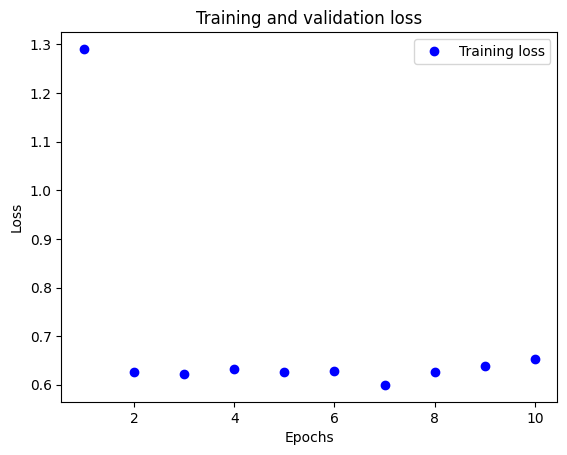

In [26]:
# plot the training and validation loss
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

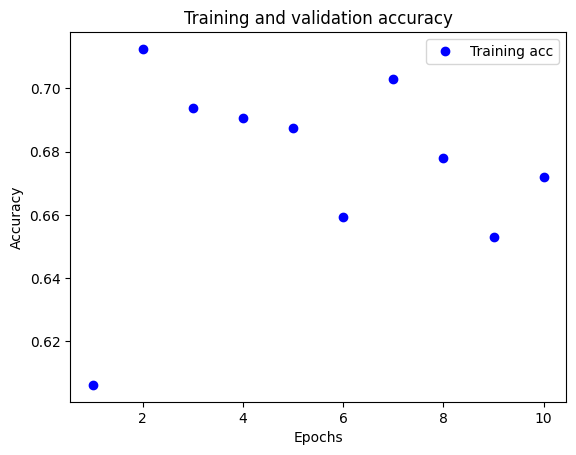

In [27]:
# plot the training and validation accuracy
plt.clf()
plt.plot(epochs, history.history['acc'], 'bo', label='Training acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [28]:
data.head()

,image,filename,label_cat,label_dog,breed_Abyssinian,breed_Bengal,breed_Birman,breed_Bombay,breed_British_Shorthair,breed_Egyptian_Mau,...,breed_newfoundland,breed_pomeranian,breed_pug,breed_saint_bernard,breed_samoyed,breed_scottish_terrier,breed_shiba_inu,breed_staffordshire_bull_terrier,breed_wheaten_terrier,breed_yorkshire_terrier
0,"[[[0.21176470588235294, 0.06274509803921569, 0...",pug_52.jpg,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,"[[[0.7215686274509804, 0.7490196078431373, 0.8...",basset_hound_112.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"[[[0.3686274509803922, 0.29411764705882354, 0....",Siamese_193.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"[[[0.2235294117647059, 0.3568627450980392, 0.0...",shiba_inu_122.jpg,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
4,"[[[0.4627450980392157, 0.3333333333333333, 0.2...",Siamese_53.jpg,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
# one-hot encode label
breed = np.array(data['breed'])
onehot_encoder = tf.one_hot()
breed = onehot_encoder.fit_transform(breed.reshape(-1, 1))
data['label'] = breed.tolist()

# optional: save preprocessed data to file
data.to_csv('preprocessed_data.csv', index=False)


KeyError: 'breed'

In [ ]:
# reshape image data to include channel
# X = data['image']
# X = tf.constant(X, dtype=tf.float32)
# reshape image data to include channel
X = data['image']
X = np.stack(X, axis=0).astype(np.float32)
X = tf.constant(X)

KeyboardInterrupt: 

In [ ]:
import keras

In [ ]:
label = np.array(data['label'])
label = label.ravel()

In [ ]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data['image'], data['label'], test_size=0.2)

In [ ]:
data['image'][2].shape

(224, 224, 3)

In [ ]:
import cv2
import tensorflow as tf

def read_image_and_annotation(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    annotation_path = image_path.replace("images", "annotations/xmls").replace(".jpg", ".xml")
    with tf.io.gfile.GFile(annotation_path, "rb") as f:
        annot = f.read()
    return img, annot

image_path = "data/images/Abyssinian_1.jpg"
img, annot = read_image_and_annotation(image_path)

Class: cat
Bounding box: 333 72 425 158


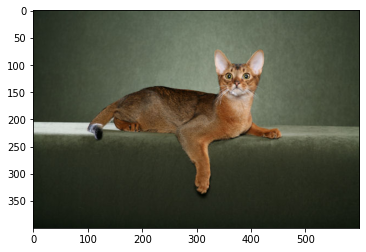

In [ ]:
import matplotlib.pyplot as plt
import cv2
import xml.etree.ElementTree as ET


def read_xml(annot_path):
    # specify the path to the XML file
    xml_path = annot_path

    # create an ElementTree object and parse the XML file
    tree = ET.parse(xml_path)

    # get the root element
    root = tree.getroot()

    # iterate over the object annotations
    for obj in root.findall("object"):
        # get the object class
        obj_class = obj.find("name").text
        print("Class:", obj_class)

        # get the bounding box coordinates
        bbox = obj.find("bndbox")
        xmin = bbox.find("xmin").text
        ymin = bbox.find("ymin").text
        xmax = bbox.find("xmax").text
        ymax = bbox.find("ymax").text
        print("Bounding box:", xmin, ymin, xmax, ymax)
        return int(xmin), int(ymin), int(xmax), int(ymax)
        
# load image and annotation
img_path = "data/images/Abyssinian_1.jpg"
annot_path = "data/annotations/xmls/Abyssinian_1.xml"
img = cv2.imread(img_path)
xmin, ymin, xmax, ymax = read_xml(annot_path)

# display image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

cv2.rectangle(img, (xmin, ymin), (xmax, ymax), (0, 255, 0), 2)

cv2.imshow("image", img)
cv2.waitKey(0)
cv2.destroyAllWindows()



Ask the professor
- what is resizing and which param to resize to and do we loose any information
- what statistics to show for the images? 
- what is the xml and trimap used for

Here are some basic statistics about the dataset:

- Number of images: 7,349
- Number of categories: 37
- Number of dog images: 3,680
- Number of cat images: 3,669
- Average image size: 500 x 353 pixels
- Image format: JPEG

##### Image segmentation algorithms
Mask R-CNN: Mask R-CNN is an extension of Faster R-CNN that adds a branch to predict object masks in parallel with the existing branch for bounding box recognition. This algorithm has been shown to be effective for image segmentation tasks, including on the Oxford-IIIT Pet Dataset.

U-Net: U-Net is a convolutional neural network architecture designed for biomedical image segmentation, but has also been shown to be effective for other types of images. U-Net consists of a contracting path to capture context and a symmetric expanding path that enables precise localization.

FCN: Fully Convolutional Networks (FCN) is a neural network architecture that replaces the fully connected layers in a traditional convolutional neural network with convolutional layers. This makes the network suitable for image segmentation tasks, as the output of the network is an image with the same dimensions as the input.

DeepLab: DeepLab is a series of neural network architectures for image segmentation. It uses a combination of dilated convolutions and atrous spatial pyramid pooling to capture multi-scale contextual information in the image.

NEXT STEPS!! 
- talk to the professor tomorrow (MARCH 30)
- data properly labelled usually 
- train the cnn after
- meet friday @5-7

# resnet

In [32]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context


In [33]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the pre-trained ResNet50 model
resnet = tf.keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers of the pre-trained ResNet50 model
for layer in resnet.layers:
    layer.trainable = False

# Add a new classification layer
x = resnet.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(256, activation='relu')(x)
x = tf.keras.layers.Dropout(0.5)(x)
predictions = tf.keras.layers.Dense(2, activation='softmax')(x)
model = tf.keras.models.Model(inputs=resnet.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Set up data generators for training, validation, and testing
train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe=train,
    directory=None,
    x_col='filename',
    y_col=['label_dog', 'label_cat'],
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=val,
    directory=None,
    x_col='filename',
    y_col=['label_dog', 'label_cat'],
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

test_generator = test_datagen.flow_from_dataframe(
    dataframe=test,
    directory=None,
    x_col='filename',
    y_col=['label_dog', 'label_cat'],
    target_size=(224, 224),
    batch_size=32,
    class_mode='raw'
)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=10,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)

# Make predictions on new images
new_images = [...]  # a list of new images to classify
new_images = np.array(new_images)
new_images = new_images / 255.0  # normalize the pixel values
preds = model.predict(new_images)


94765736/94765736 [==============================] - 3s 0us/step
Found 4725 validated image filenames.
Found 1182 validated image filenames.
Found 0 validated image filenames.


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1477 invalid image filename(s) in x_col="filename". These filename(s) will be ignored.
  warnings.warn(


Epoch 1/10


2023-04-09 15:41:52.547960: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'Placeholder/_0' with dtype int32
	 [[{{node Placeholder/_0}}]]


 61/148 [===========>..................] - ETA: 5:34 - loss: 0.8518 - accuracy: 0.6301

KeyboardInterrupt: 